Applied interval-transform to amp and added transformed amp_interval_ to model.
Applied interval-transform to size and added transformed size_interval_ to model.
Assigned NUTS to amp_interval_
Assigned NUTS to size_interval_
Assigned NUTS to ps
 [-----------------100%-----------------] 2000 of 2000 complete in 2.6 sec

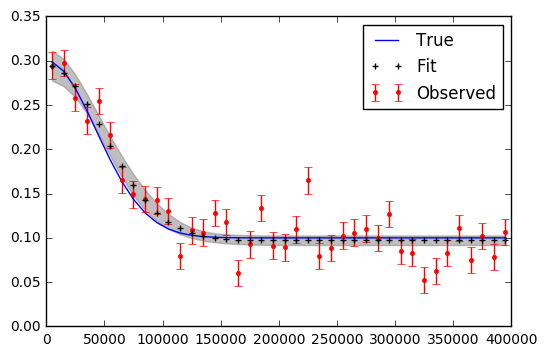

In [1]:
import numpy as np
from pymc3 import *
import matplotlib.pyplot as plt

# set random seed for reproducibility
np.random.seed(12345)

x = np.arange(5,400,10)*1e3

# Parameters for gaussian
amp_true = 0.2
size_true = 1.8
ps_true = 0.1

#Gaussian function
gauss = lambda x,amp,size,ps: amp*np.exp(-1*(np.pi**2/(3600.*180.)*size*x)**2/(4.*np.log(2.)))+ps
f_true = gauss(x=x,amp=amp_true, size=size_true, ps=ps_true )

# add noise to the data points
noise = np.random.normal(size=len(x)) * .02 
f = f_true + noise 
f_error = np.ones_like(f_true)*0.05*f.max()

with Model() as model3:
    amp = Uniform('amp', 0.05, 0.4, testval= 0.15)
    size = Uniform('size', 0.5, 2.5, testval= 1.0)
    ps = Normal('ps', 0.13, 40, testval=0.15)

    gauss=Deterministic('gauss',amp*np.exp(-1*(np.pi**2*size*x/(3600.*180.))**2/(4.*np.log(2.)))+ps)

    y =Normal('y', mu=gauss, tau=1.0/f_error**2, observed=f)

    start=find_MAP()
    step=NUTS()
    trace=sample(2000,start=start)

# extract and plot results
y_min = np.percentile(trace.gauss,2.5,axis=0)
y_max = np.percentile(trace.gauss,97.5,axis=0)
y_fit = np.percentile(trace.gauss,50,axis=0)
plt.plot(x,f_true,'b', marker='None', ls='-', lw=1, label='True')
plt.errorbar(x,f,yerr=f_error, color='r', marker='.', ls='None', label='Observed')
plt.plot(x,y_fit,'k', marker='+', ls='None', ms=5, mew=1, label='Fit')
plt.fill_between(x, y_min, y_max, color='0.5', alpha=0.5)
plt.legend()

In [3]:
import pymc3 as pm3
# define the model/function to be fitted in PyMC3:
with Model() as modelx:

    x_obsx = pm3.Normal('x_obsx',mu=x, tau=(1e4)**-2,shape=40).random()

    ampx = Uniform('ampx', 0.05, 0.4, testval= 0.15)
    sizex = Uniform('sizex', 0.5, 2.5, testval= 1.0)
    psx = Normal('psx', 0.13, 40, testval=0.15)

    x_pred = Normal('x_pred', mu=x_obsx, tau=(1e4)**-2*np.ones_like(x_obsx),testval=5*np.ones_like(x_obsx),shape=40) # this allows error in x_obs

    gauss=Deterministic('gauss',ampx*np.exp(-1*(np.pi**2*sizex*x_pred/(3600.*180.))**2/(4.*np.log(2.)))+psx)

    y = Normal('y', mu=gauss, tau=1.0/f_error**2, observed=f)

    start=find_MAP()
    step=NUTS()
    tracex=sample(20000,start=start)

Applied interval-transform to ampx and added transformed ampx_interval_ to model.
Applied interval-transform to sizex and added transformed sizex_interval_ to model.
Assigned NUTS to x_obsx
Assigned NUTS to ampx_interval_
Assigned NUTS to sizex_interval_
Assigned NUTS to psx
Assigned NUTS to x_pred
 [-----------------100%-----------------] 20000 of 20000 complete in 154.4 sec

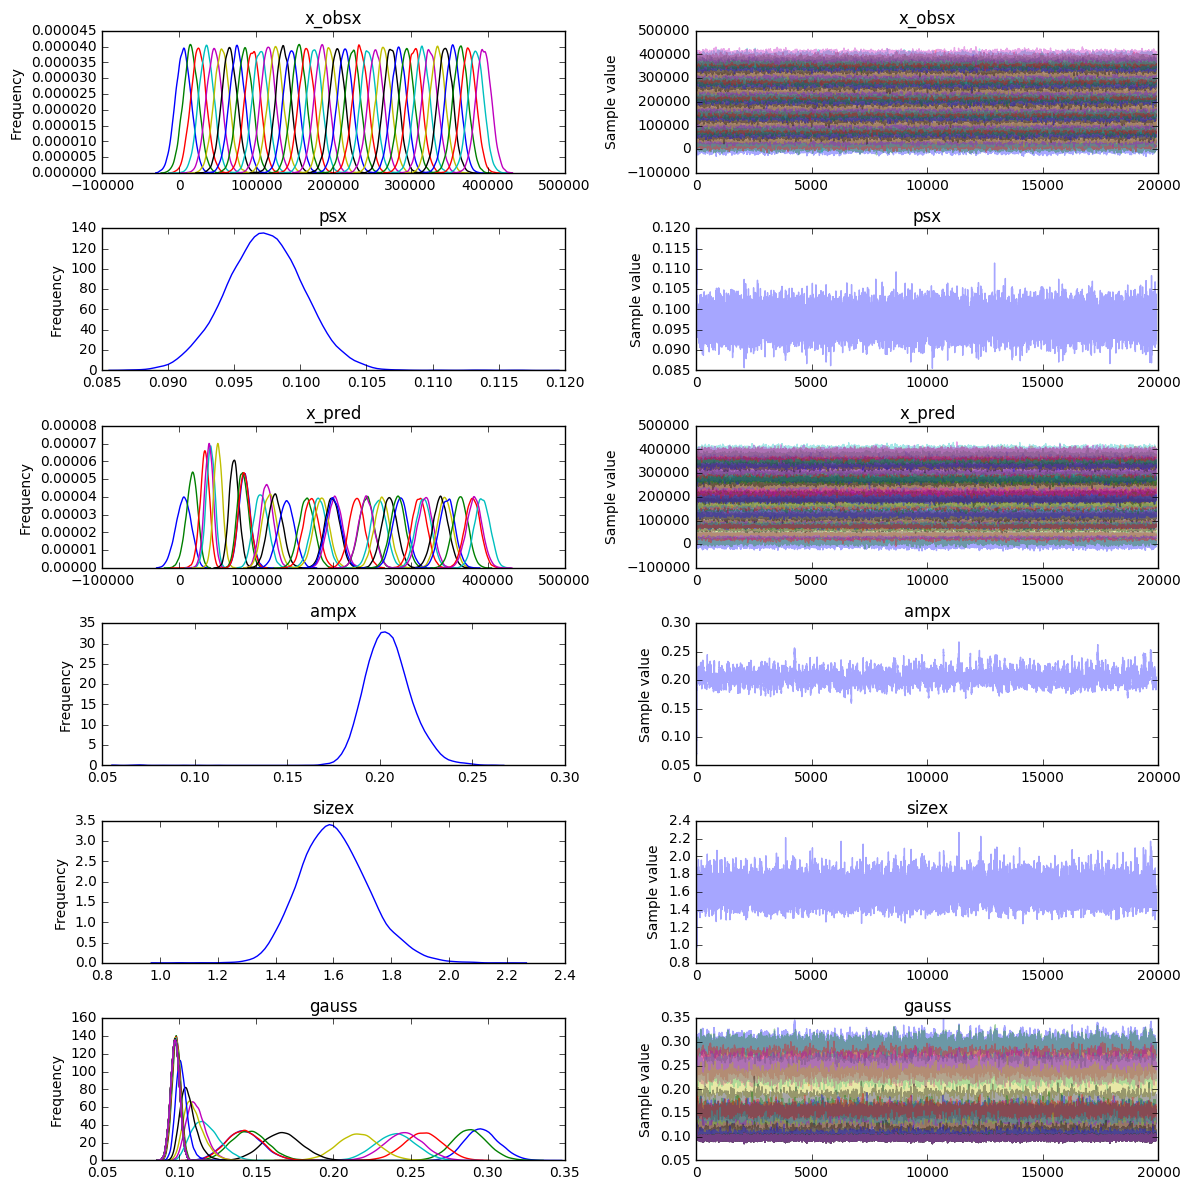

In [4]:
traceplot(tracex[100:])
plt.tight_layout();